In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
from fastai.vision import *
import os

In [4]:
bs = 16

In [5]:
data_dir='../input/cell_images/cell_images'
path = Path(data_dir)

In [6]:
path.ls()

[PosixPath('../input/cell_images/cell_images/Uninfected'),
 PosixPath('../input/cell_images/cell_images/Parasitized')]

In [7]:
tfms = get_transforms(do_flip = True)
data = (ImageList.from_folder(path).split_by_rand_pct().label_from_folder().transform(tfms,size = 224).databunch()).normalize()

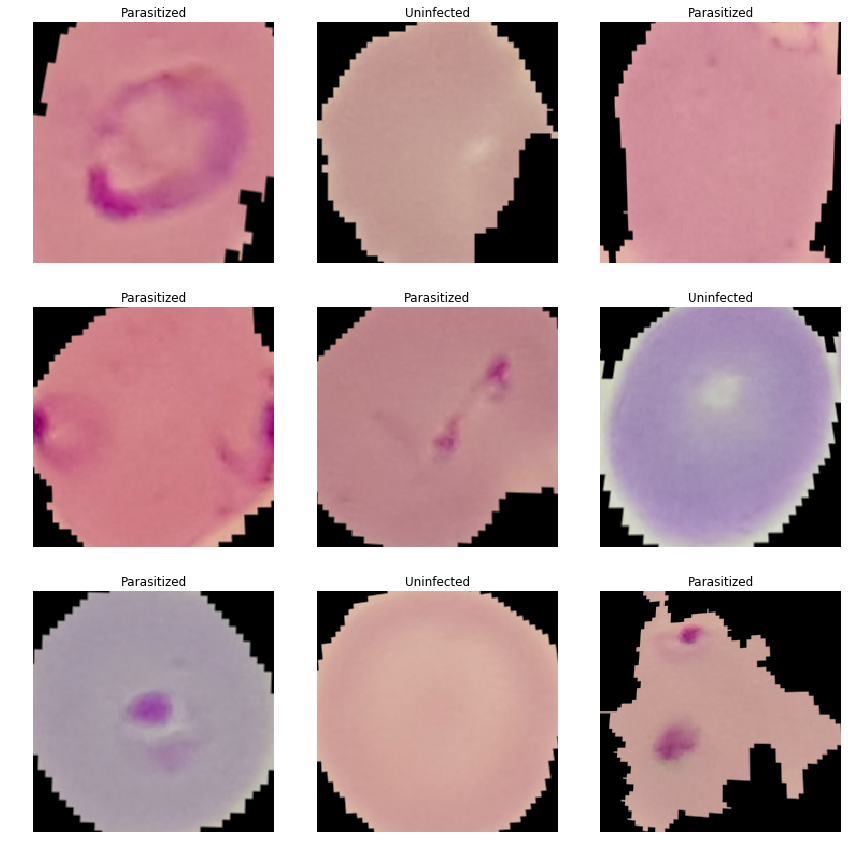

In [8]:
data.show_batch(rows = 3,size=(9,5))

In [9]:
learn = cnn_learner(data,models.resnet50,metrics = accuracy,model_dir = '/tmp/model/')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 69877048.33it/s]


In [10]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.212886,0.157642,0.943205,03:50
1,0.158933,0.115668,0.959717,03:21
2,0.132985,0.092588,0.967701,03:21
3,0.125700,0.084328,0.970786,03:20
4,0.126431,0.082139,0.972237,03:20


In [11]:
learn.save('model_malaria_cell')

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)


True

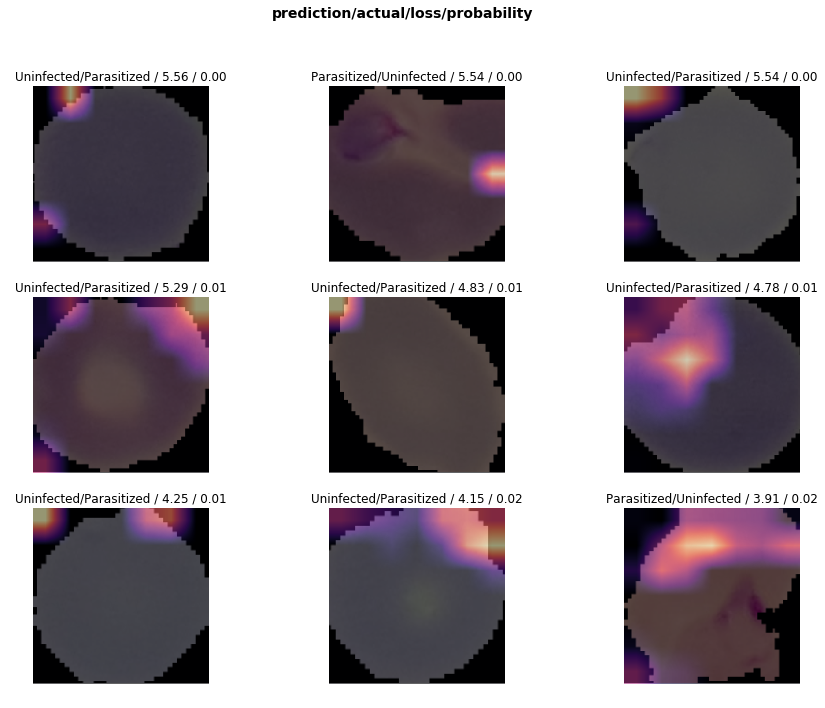

In [13]:
interp.plot_top_losses(9, figsize=(15,11))

In [14]:
doc(interp.plot_top_losses)
interp.most_confused(min_val=2)

[('Parasitized', 'Uninfected', 103), ('Uninfected', 'Parasitized', 50)]

In [15]:
learn.load('model_malaria_cell');

In [16]:
learn.lr_find(num_it = 200)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


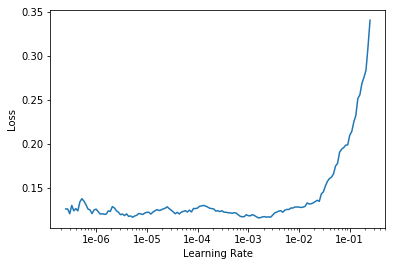

In [17]:
learn.recorder.plot()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.118764,0.083919,0.970967,03:42
1,0.118157,0.081574,0.970786,03:38
2,0.106697,0.078748,0.972419,03:33
3,0.107261,0.077359,0.973870,03:27
4,0.091016,0.073228,0.973508,03:27
5,0.089193,0.071776,0.974052,03:26
6,0.076033,0.070668,0.974778,03:35
7,0.077151,0.072829,0.975141,03:40
8,0.081541,0.070147,0.974233,03:41
9,0.084892,0.070519,0.974596,03:41


In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

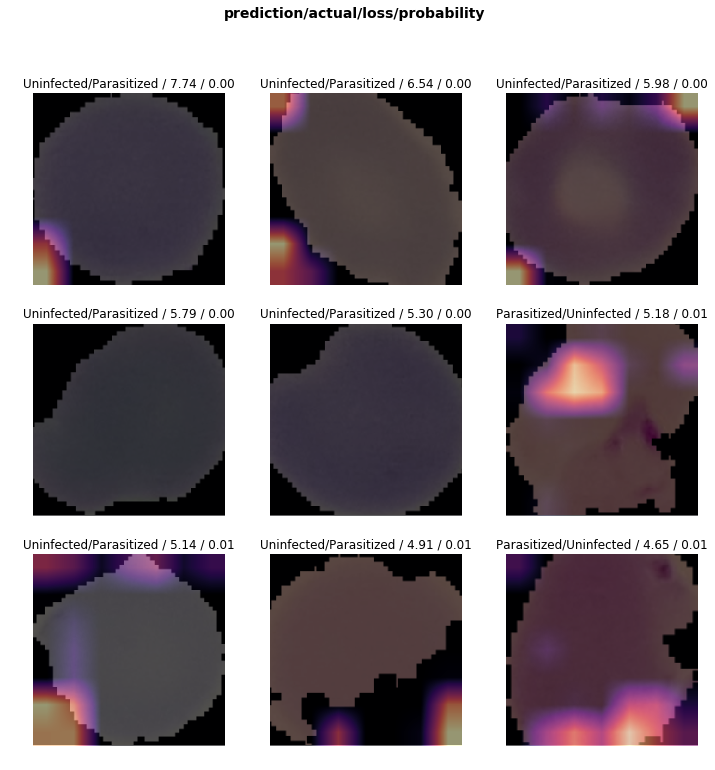

In [20]:
interp.plot_top_losses(9)

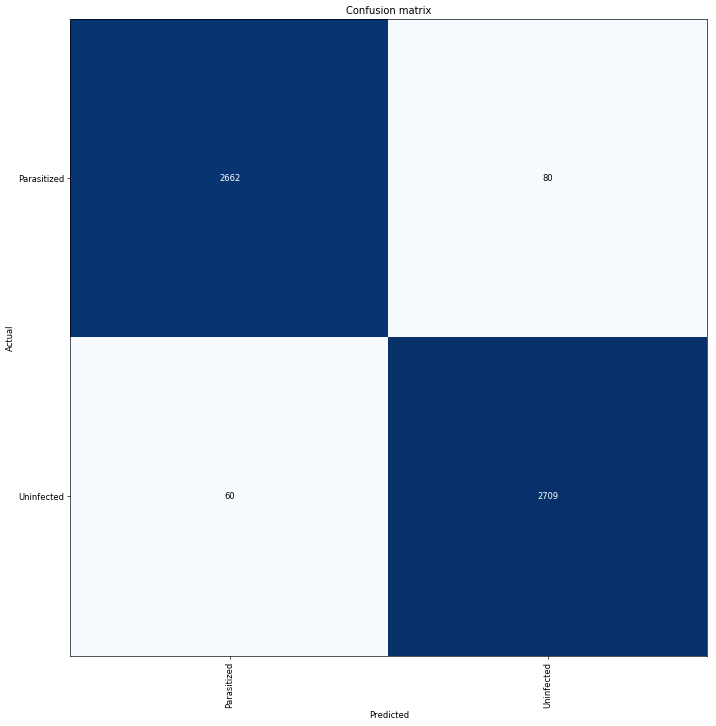

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:
interp.most_confused(min_val=2)

[('Parasitized', 'Uninfected', 80), ('Uninfected', 'Parasitized', 60)]

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True